# Titanic Dataset with Decision Tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import dtreeviz

In [2]:
titanic = pd.read_feather('datasets/titanic.feather')
titanic

,pclass,is_female,age,sibsp,parch,survived
0,1,1,29,0,0,1
1,1,0,0,1,2,1
2,1,1,2,1,2,0
3,1,0,30,1,2,0
4,1,1,25,1,2,0
...,...,...,...,...,...,...
1304,3,1,14,1,0,0
1305,3,1,9999,1,0,0
1306,3,0,26,0,0,0
1307,3,0,27,0,0,0


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   pclass     1309 non-null   int64
 1   is_female  1309 non-null   int32
 2   age        1309 non-null   int32
 3   sibsp      1309 non-null   int64
 4   parch      1309 non-null   int64
 5   survived   1309 non-null   int32
dtypes: int32(3), int64(3)
memory usage: 46.1 KB


In [4]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
is_female,1309.0,0.355997,0.478997,0.0,0.0,0.0,1.0,1.0
age,1309.0,2032.825057,3996.042368,0.0,22.0,32.0,55.0,9999.0
sibsp,1309.0,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
parch,1309.0,0.385027,0.865560,0.0,0.0,0.0,0.0,9.0
survived,1309.0,0.381971,0.486055,0.0,0.0,0.0,1.0,1.0


In [5]:
# fix error '9999' in the age column
titanic.loc[titanic['age'] == 9999, 'age'] = 99

titanic.loc[titanic['age'] > 199]

,pclass,is_female,age,sibsp,parch,survived


In [6]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
is_female,1309.0,0.355997,0.478997,0.0,0.0,0.0,1.0,1.0
age,1309.0,43.749427,30.568090,0.0,22.0,32.0,55.0,99.0
sibsp,1309.0,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
parch,1309.0,0.385027,0.865560,0.0,0.0,0.0,0.0,9.0
survived,1309.0,0.381971,0.486055,0.0,0.0,0.0,1.0,1.0


In [7]:
X = titanic.iloc[:, :-1]
y = titanic.iloc[:, -1]

X.shape, y.shape

((1309, 5), (1309,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((981, 5), (328, 5), (981,), (328,))

In [9]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

accuracy = dt.score(X_test, y_test)

print(f"test accuracy: {accuracy:.3}")

test accuracy: 0.759


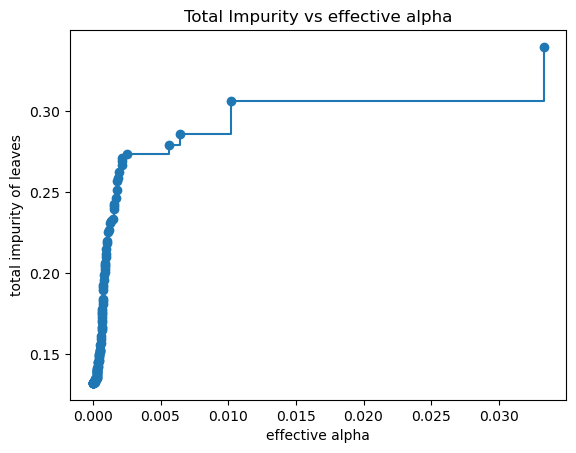

In [10]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha")
plt.show()

In [11]:
best_pruning = []
for ccp_alpha in ccp_alphas:
    if ccp_alpha > 0:
        dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        dt.fit(X_train, y_train)
        best_pruning.append([ccp_alpha, dt.score(X_test, y_test)])

best_pruning = sorted(best_pruning, key=lambda x:x[1], reverse=True)
best_ccp_alpha = best_pruning[0][0]

dt = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)

print(f"test accuracy: {accuracy:0.3}")
print(f"Number of nodes in the last tree is: \
{dt.tree_.node_count} with ccp_alpha: {best_ccp_alpha:0.3}")

test accuracy: 0.805
Number of nodes in the last tree is: 13 with ccp_alpha: 0.0025


C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


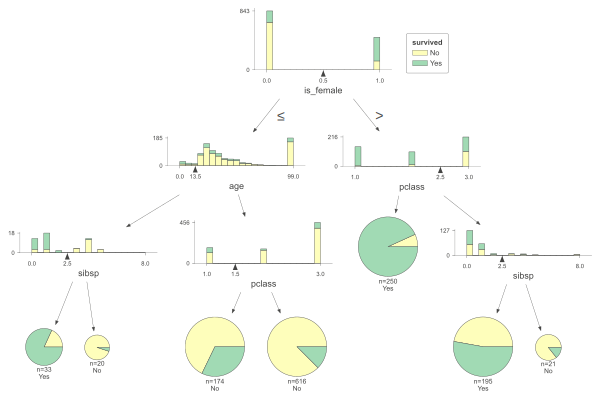

In [12]:
viz = dtreeviz.model(dt, X, y,
                     target_name='survived',
                     feature_names=X.columns,
                     class_names=["No", "Yes"])
viz.view()